In [2]:
import pandas as pd
import numpy as np
data_path = 'Documents/UiPath/cars_analyze1/cars_data2.csv'
df = pd.read_csv(data_path,encoding='unicode_escape')
# df = pd.read_csv(data_path)
df.head()

,Car,Mileage,Engine,Registration year,Transmission,Price
0,2003 SUBARU LEGACY B4 2.0R,39000,1990,2003 / 9\n2003,AT,335000
1,2007 SUBARU LEGACY B4 2.0I B-SPORT,113000,1990,2007 / 11\n2007,AT,345000
2,2014 SUBARU IMPREZA G4 1.6I,90000,1590,2014 / 9\n2014,AT,350000
3,2001 TOYOTA ALTEZZA AS200 WISE-SELECTION,124000,1980,2001 / 12\n2001,AT,355000
4,2012 SUBARU IMPREZA G4 1.6I-L,77000,1590,2012 / 10\n2012,AT,370000


In [3]:
print(df.dtypes)

Car                  object
Mileage               int64
Engine                int64
Registration year    object
Transmission         object
Price                 int64
dtype: object


In [4]:
# df.corr()

In [5]:
df[['Mileage','Engine','Price']].corr()

,Mileage,Engine,Price
Mileage,1.000000,0.061152,-0.011112
Engine,0.061152,1.000000,-0.053250
Price,-0.011112,-0.053250,1.000000


In [6]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [7]:
df[['Engine','Price']].corr()

,Engine,Price
Engine,1.00000,-0.05325
Price,-0.05325,1.00000


In [8]:
data2_path = 'Documents/UiPath/cars_analyze1/cars_data.csv'
df2 = pd.read_csv(data2_path,encoding='unicode_escape')
df2.head()

,Car,Registration year,Transmission,Price,Mileage,Engine
0,2022 MERCEDES-BENZ CLS-CLASS 4AA-257361 4WD,2022 / Jul,Automatic,84355,9000,2996
1,2013 NISSAN TEANA J32 2WD,2013 / May,Cvt,2306,71000,2500
2,2007 MERCEDES-BENZ E-CLASS 2WD,2007 / Mar,Automatic,3800,58000,3000
3,2006 NISSAN FUGA Y50 2WD,2006 / Sep,Automatic,2313,65000,2500
4,2010 MERCEDES-BENZ C-CLASS DBA-204048 2WD,2010 / Apr,Automatic,2358,106400,1800


In [9]:
df2[['Engine','Price']].corr()

,Engine,Price
Engine,1.000000,0.495297
Price,0.495297,1.000000


In [ ]:
# dealing with ouliers in transmission column of cars_data.csv
for transmission in df2['Transmission']:
    if transmission!='Automatic' and transmission!='Cvt' and transmission!='Manual':
        df2['Transmission']=df2['Transmission'].replace(transmission, 'Unspecified')

# Replace values greater than 5000 with the mean of 'Engine'
mean_cc = df2['Engine'].mean()
df2['Engine'] = df2['Engine'].apply(lambda x: mean_cc if x >= 10000 else x)

#slicing registration year
df2['Registration year'] = df2['Registration year'].str[:4]
df2['Registration year'] = pd.to_numeric(df2['Registration year'], errors='coerce')
median_yr = df2['Registration year'].median()
df2['Registration year'] = df2['Registration year'].fillna(median_yr)
df2['Registration year'] = df2['Registration year'].astype(int)
data_path = 'Documents/UiPath/cars_analyze1/cars_data2.csv'
df = pd.read_csv(data_path,encoding='unicode_escape')
df.head()

#slicing registration year
df['Registration year'] = df['Registration year'].str[:4]
df['Registration year'] = pd.to_numeric(df['Registration year'], errors='coerce')
median_yr = df['Registration year'].median()
df['Registration year'] = df['Registration year'].fillna(median_yr)
df['Registration year'] = df['Registration year'].astype(int)

for transmission in df['Transmission']:
    if transmission!='AT' and transmission!='F5' and transmission!='F6':
        df['Transmission']=df['Transmission'].replace(transmission, 'Unspecified')

for transmission in df['Transmission']:     
    if transmission=='AT':
        df['Transmission']=df['Transmission'].replace(transmission, 'Automatic')
    if transmission=='F5' or transmission=='F6':
        df['Transmission']=df['Transmission'].replace(transmission, 'Manual')

# Replace values greater than 5000 with the mean of 'Engine'
mean_cc = df['Engine'].mean()
df['Engine'] = df['Engine'].apply(lambda x: mean_cc if x >= 10000 else x)

#convert yen to dollar
rate = 0.0070    # 1 yen = 0.0070 dollars
df['Price'] = df['Price'].apply(lambda x: x*rate)
df['Price'] = df['Price'].astype(int)  #convert price column to integers

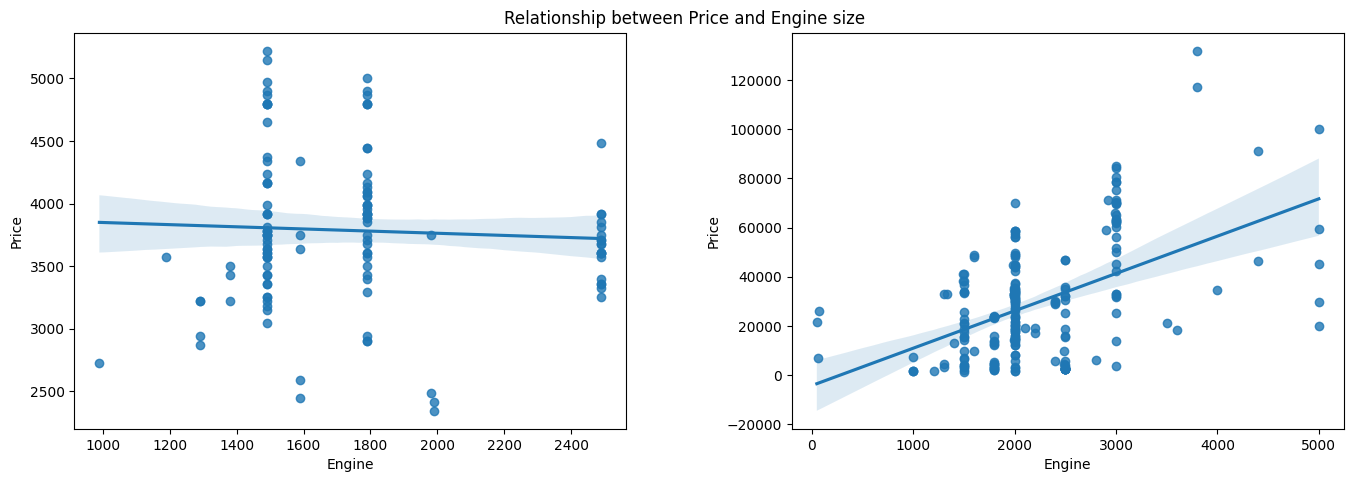

In [ ]:
fig,axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)
fig.suptitle("Relationship between Price and Engine size")
fig.set_figwidth(15)
sea.regplot(x="Engine", y="Price", data=df, ax=axs[0])
sea.regplot(x="Engine", y="Price", data=df2, ax=axs[1])
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp1.jpg',format='jpg',dpi=300)

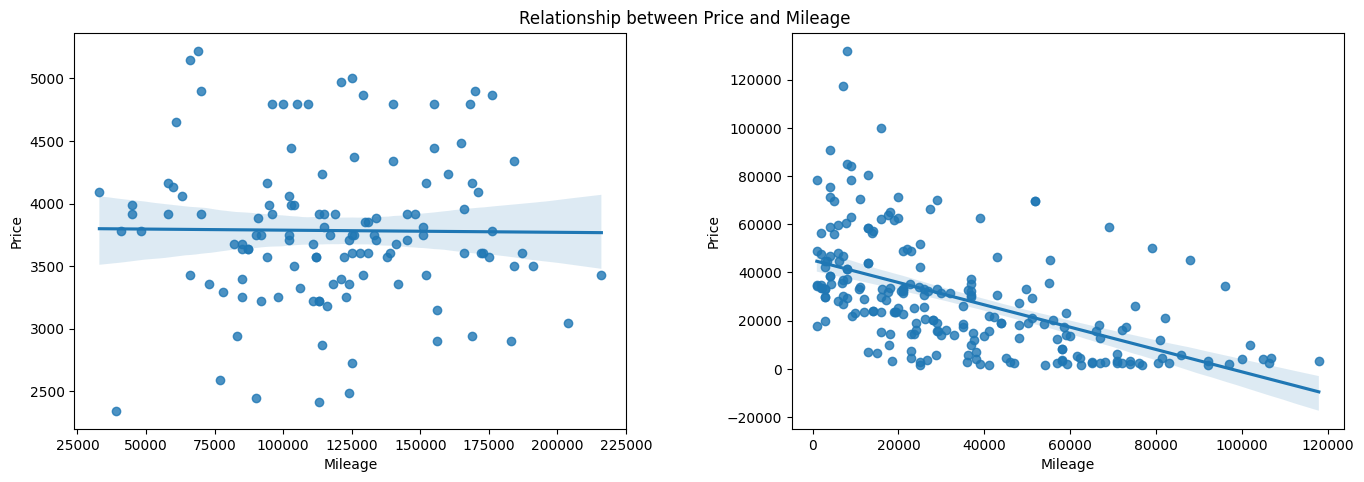

In [ ]:
fig,axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)
fig.suptitle("Relationship between Price and Mileage")
fig.set_figwidth(15)
sea.regplot(x="Mileage", y="Price", data=df, ax=axs[0])
sea.regplot(x="Mileage", y="Price", data=df2, ax=axs[1])
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp2.jpg',format='jpg',dpi=300)

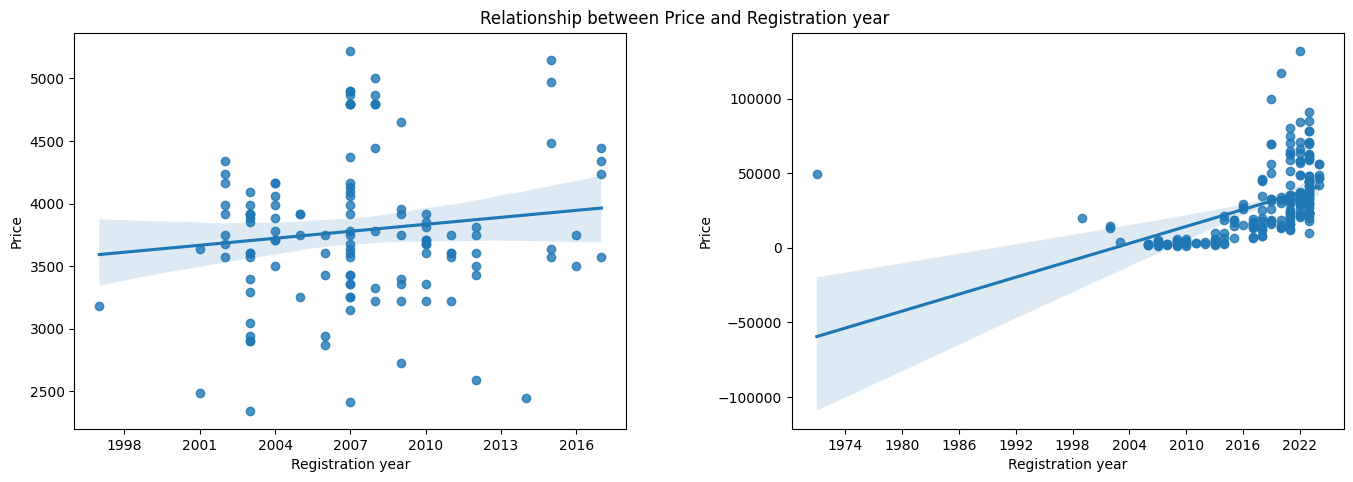

In [ ]:
import matplotlib.ticker as ticker

fig,axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)
fig.suptitle("Relationship between Price and Registration year")
fig.set_figwidth(15)
sea.regplot(x="Registration year", y="Price", data=df, ax=axs[0])
sea.regplot(x="Registration year", y="Price", data=df2, ax=axs[1])
for ax in axs:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp3.jpg',format='jpg',dpi=300)

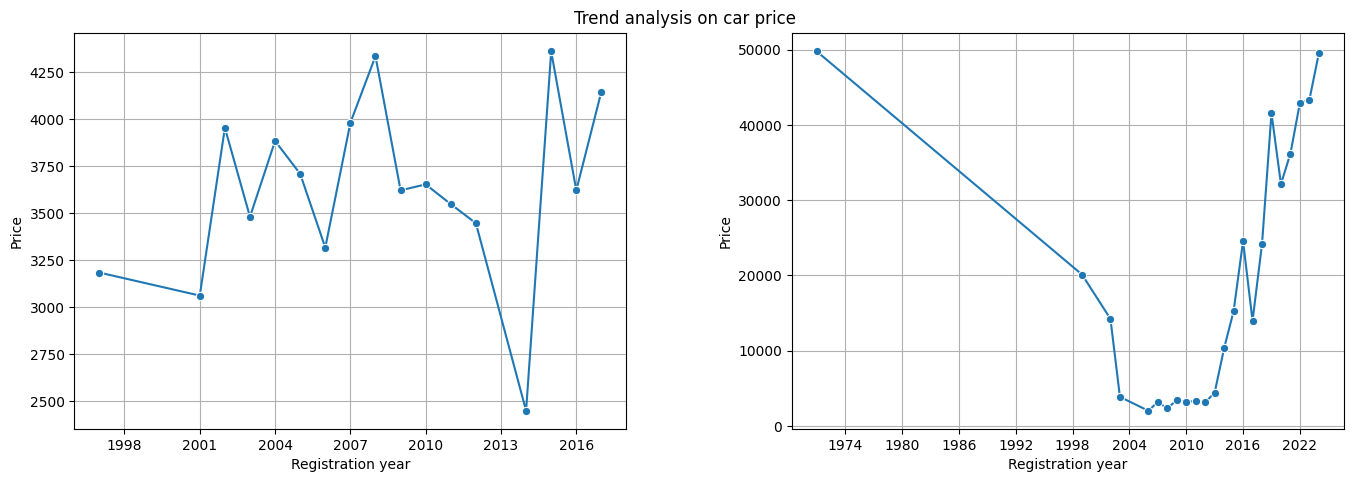

In [ ]:
fig,axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)
fig.suptitle("Trend analysis on car price")
fig.set_figwidth(15)

average_price_by_year1 = df.groupby('Registration year')['Price'].mean().reset_index()
average_price_by_year2 = df2.groupby('Registration year')['Price'].mean().reset_index()

sea.lineplot(data=average_price_by_year1, x='Registration year', y='Price', marker='o',ax=axs[0])
sea.lineplot(data=average_price_by_year2, x='Registration year', y='Price', marker='o',ax=axs[1])
for ax in axs:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[0].grid(True)
axs[1].grid(True)
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp4.jpg',format='jpg',dpi=300)

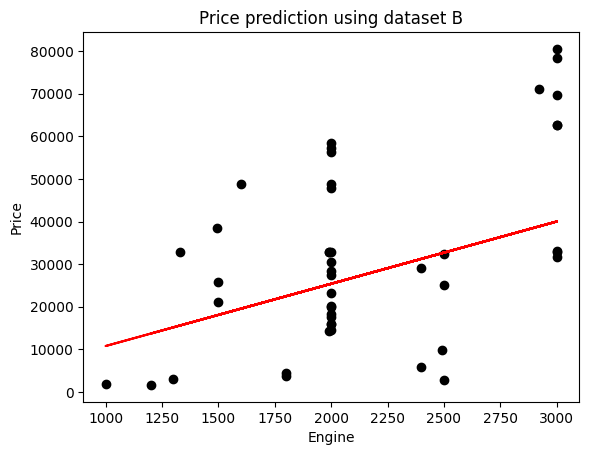

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df2[['Engine']]
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l_regr = linear_model.LinearRegression()
l_regr.fit(X_train,y_train)

y_pred = l_regr.predict(X_test)

plt.scatter(X_test, y_test,color='black')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('Price prediction using dataset B')
plt.plot(X_test, y_pred, color='red')
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp7.jpg',format='jpg',dpi=300)

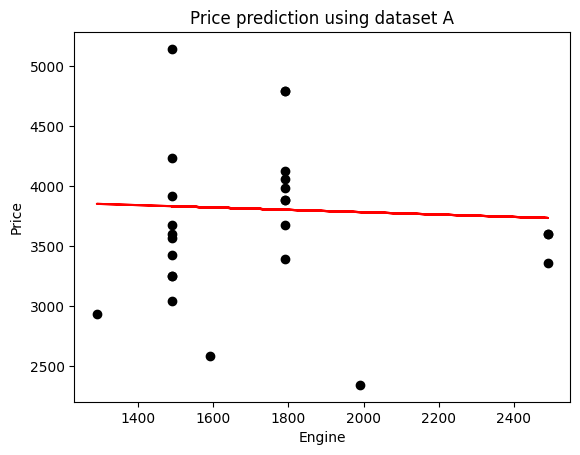

In [ ]:
X = df[['Engine']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l_regr = linear_model.LinearRegression()
l_regr.fit(X_train,y_train)

y_pred = l_regr.predict(X_test)

plt.scatter(X_test, y_test,color='black')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('Price prediction using dataset A')
plt.plot(X_test, y_pred, color='red')
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp6.jpg',format='jpg',dpi=300)

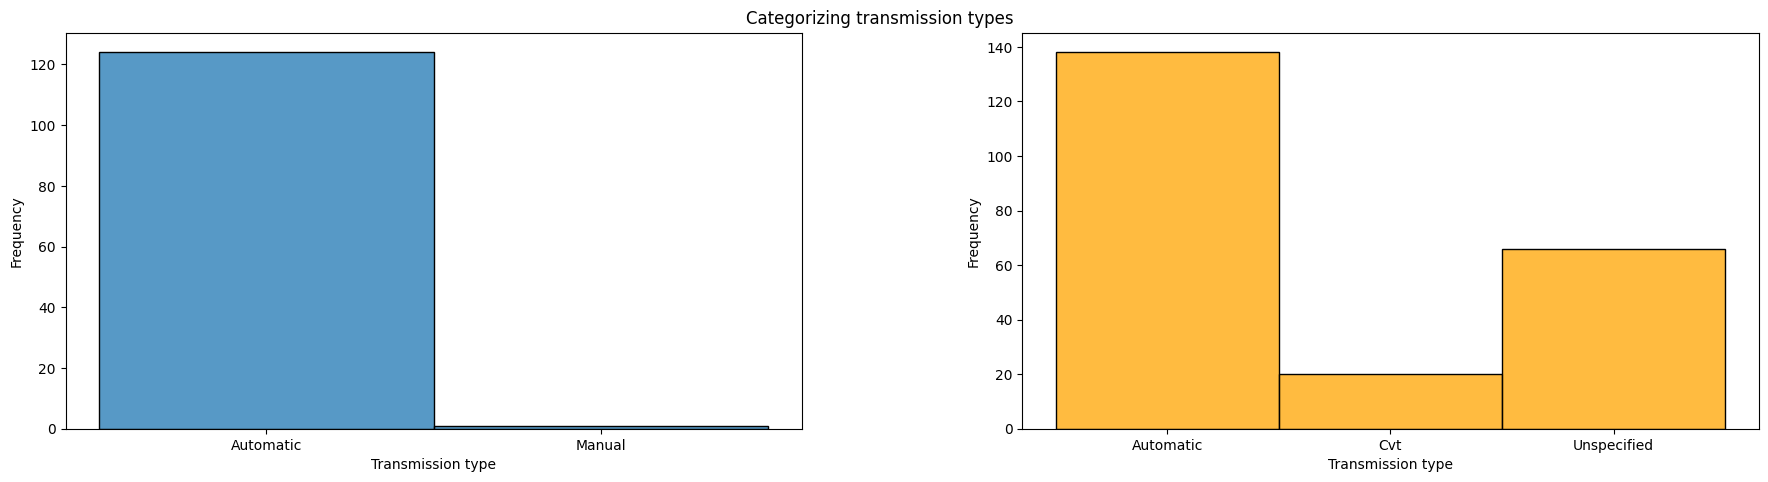

In [ ]:
fig,axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)
fig.suptitle("Categorizing transmission types")
fig.set_figwidth(20)
sea.histplot(df['Transmission'],bins=5,ax=axs[0],kde=False)
axs[0].set_xlabel('Transmission type')
axs[0].set_ylabel('Frequency')

sea.histplot(df2['Transmission'],bins=5,ax=axs[1],kde=False,color='orange')
axs[1].set_xlabel('Transmission type')
axs[1].set_ylabel('Frequency')
plt.savefig('C:/Users/Lenovo/Downloads/Picture/cmp5.jpg',format='jpg',dpi=300)